In [4]:
!pip install numpy pandas geopandas matplotlib scikit-learn


In [29]:
merged_data=pd.read_csv('merged.csv')

In [30]:
merged_data

,latitude,longitude,yield,fertilizer_use,ndvi,evi,soil_carbon,soil_moisture
0,0.976270,1.857605,3993.071925,38.592849,0.374794,0.601560,8.303666,19.488687
1,4.303787,-9.798726,1720.810829,56.727442,0.428686,0.513534,5.284756,27.036641
2,2.055268,-0.483476,2556.092578,69.984906,0.683057,0.782137,5.708404,32.250449
3,0.897664,4.175408,1150.400726,40.791344,0.600948,0.887078,3.254685,34.804523
4,-1.526904,-9.120491,1047.150957,107.905657,0.070483,0.002012,6.445387,33.574445
...,...,...,...,...,...,...,...,...
995,-8.046473,5.825631,1534.924814,99.696080,0.476668,0.923183,9.475184,17.237378
996,0.298444,4.423962,1478.974275,24.352343,0.272310,0.941301,5.915195,20.220577
997,8.768240,-0.397844,2018.946810,168.696191,0.822093,0.801828,3.912523,34.050103
998,-5.427069,2.877281,4313.685656,188.581857,0.829115,0.539145,8.321905,37.648216


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize
import seaborn as sns  # Import seaborn for the correlation matrix

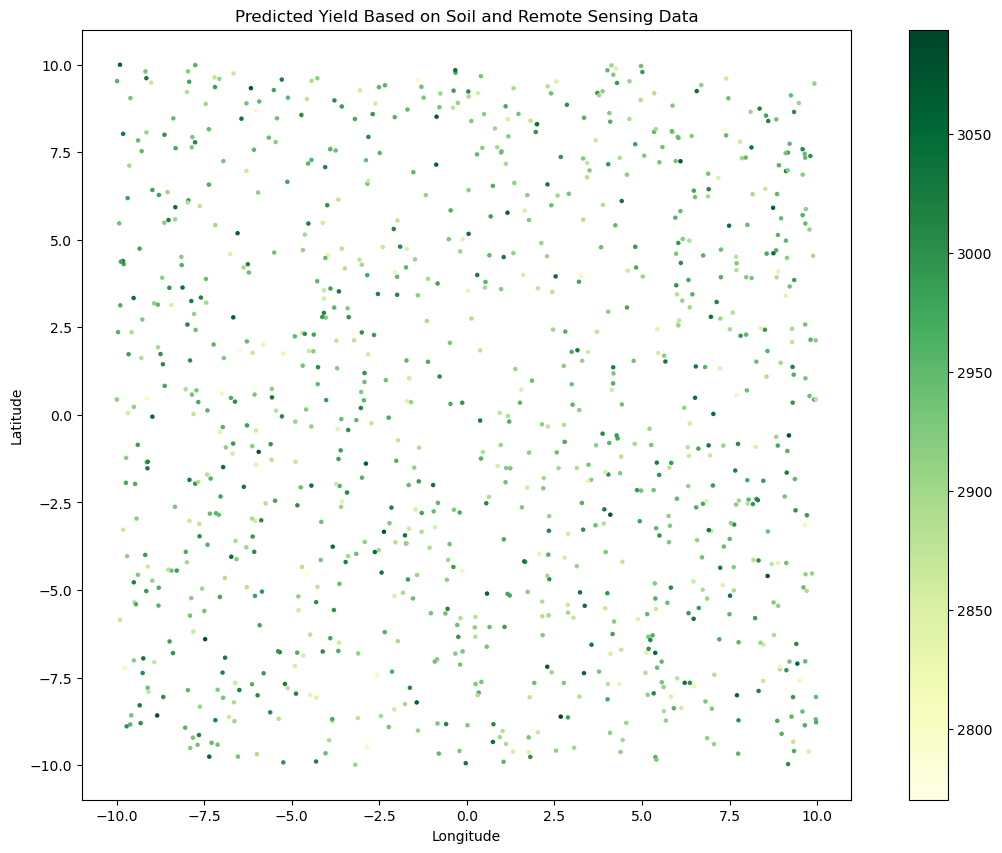

       soil_carbon  soil_moisture         ndvi          evi  fertilizer_use  \
count  1000.000000    1000.000000  1000.000000  1000.000000     1000.000000   
mean      5.549033      21.929336     0.491320     0.494825       99.775533   
std       2.581999      10.018780     0.285956     0.296249       57.923491   
min       1.000663       5.002536     0.000851     0.000150        0.574902   
25%       3.443202      13.405640     0.232470     0.223674       48.917284   
50%       5.505465      21.189241     0.492362     0.498799       99.147465   
75%       7.811042      30.681316     0.736860     0.747941      149.199549   
max       9.999676      39.997590     0.999478     0.999708      199.958838   

             yield  predicted_yield  
count  1000.000000      1000.000000  
mean   2938.683289      2938.683289  
std    1142.284754        57.731241  
min    1000.827794      2770.363091  
25%    1985.695612      2896.233990  
50%    2880.821416      2936.937994  
75%    3915.526537    

In [20]:

# Load data from CSV files (replace 'path_to_file' with actual file paths)
soil_data = pd.read_csv('soil_assessment_data.csv')
remote_sensing_data = pd.read_csv('remote_sensing_data.csv')
precision_agriculture_data = pd.read_csv('precision_agriculture_data.csv')


# Check if merged_data is not empty
if merged_data.empty:
    raise ValueError("The merged dataset is empty. Ensure the data files have overlapping latitude and longitude ranges.")

# Convert to GeoDataFrame for spatial analysis
gdf = gpd.GeoDataFrame(
    merged_data, 
    geometry=gpd.points_from_xy(merged_data.longitude, merged_data.latitude)
)

# Perform linear regression to predict yield based on soil carbon, soil moisture, ndvi, evi, and fertilizer use
X = gdf[['soil_carbon', 'soil_moisture', 'ndvi', 'evi', 'fertilizer_use']]
y = gdf['yield']

model = LinearRegression()
model.fit(X, y)
gdf['predicted_yield'] = model.predict(X)

# Visualize the results
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(column='predicted_yield', ax=ax, legend=True, cmap='YlGn', markersize=5)
plt.title('Predicted Yield Based on Soil and Remote Sensing Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Summary statistics
print(gdf[['soil_carbon', 'soil_moisture', 'ndvi', 'evi', 'fertilizer_use', 'yield', 'predicted_yield']].describe())


                soil_carbon  soil_moisture      ndvi       evi  \
soil_carbon        1.000000       0.046551 -0.023148  0.009384   
soil_moisture      0.046551       1.000000 -0.043459 -0.025812   
ndvi              -0.023148      -0.043459  1.000000 -0.016503   
evi                0.009384      -0.025812 -0.016503  1.000000   
fertilizer_use    -0.015780       0.010922  0.036469 -0.044869   
yield             -0.017253       0.015500 -0.013720 -0.030420   

                fertilizer_use     yield  
soil_carbon          -0.015780 -0.017253  
soil_moisture         0.010922  0.015500  
ndvi                  0.036469 -0.013720  
evi                  -0.044869 -0.030420  
fertilizer_use        1.000000 -0.028737  
yield                -0.028737  1.000000  


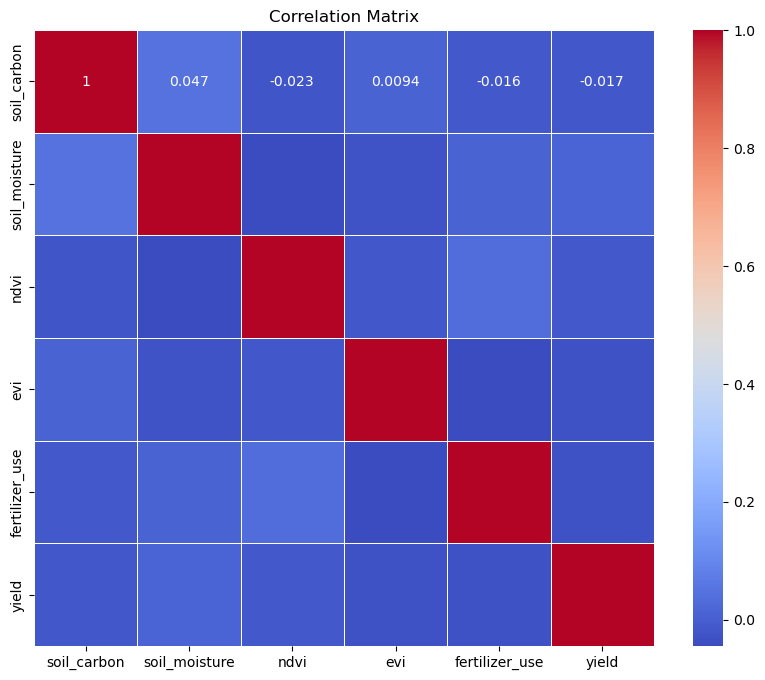

In [23]:
# Correlation matrix to understand relationships between variables
corr_matrix = gdf[['soil_carbon', 'soil_moisture', 'ndvi', 'evi', 'fertilizer_use', 'yield']].corr()
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


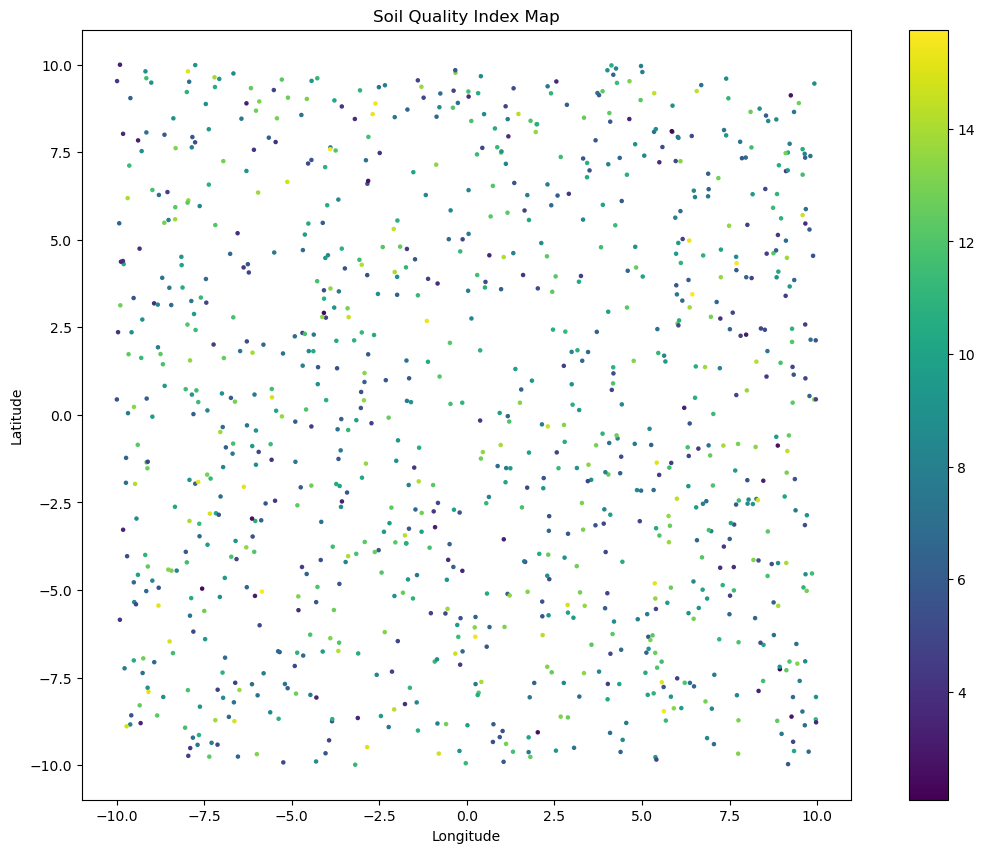

In [24]:
# Soil quality index based on multiple factors
gdf['soil_quality_index'] = (gdf['soil_carbon'] * 0.4 + gdf['soil_moisture'] * 0.3 + 
                             gdf['ndvi'] * 0.2 + gdf['evi'] * 0.1)

# Visualize soil quality index
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(column='soil_quality_index', ax=ax, legend=True, cmap='viridis', markersize=5)
plt.title('Soil Quality Index Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Mean Squared Error: 1425695.713493402
R-squared: -0.10937899893094016


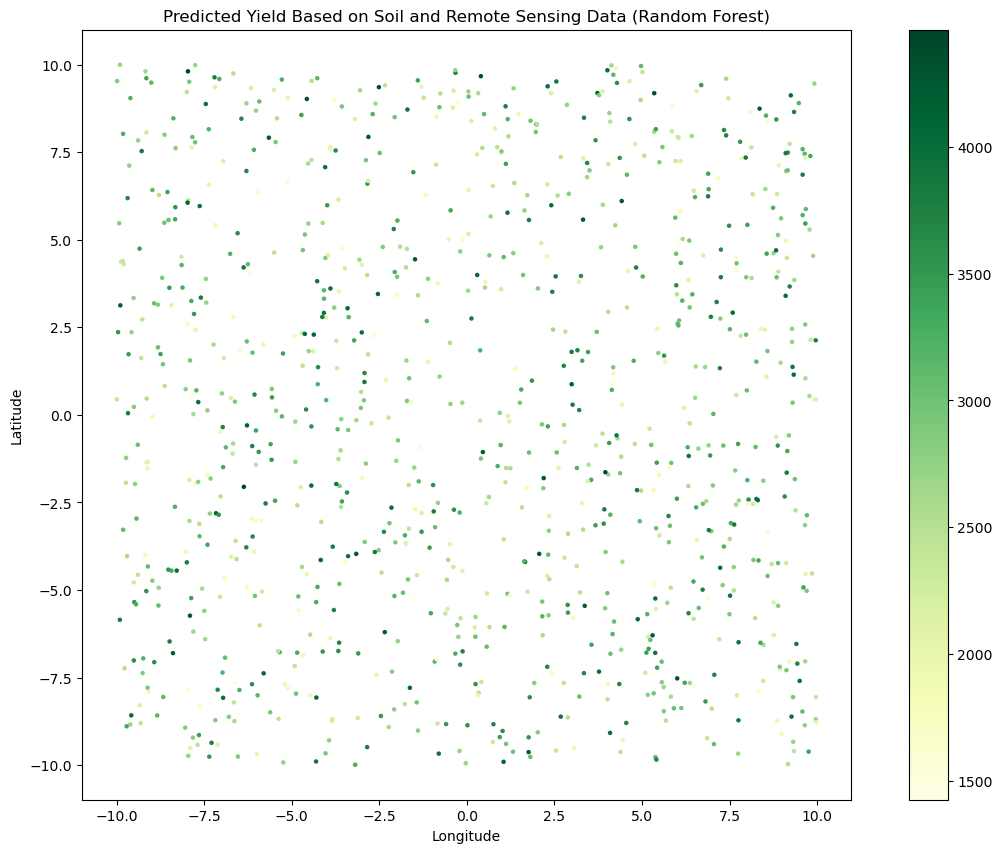

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = gdf[['soil_carbon', 'soil_moisture', 'ndvi', 'evi', 'fertilizer_use']]
y = gdf['yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Add predictions to the GeoDataFrame
gdf['predicted_yield_rf'] = rf_model.predict(X)

# Visualize the results
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(column='predicted_yield_rf', ax=ax, legend=True, cmap='YlGn', markersize=5)
plt.title('Predicted Yield Based on Soil and Remote Sensing Data (Random Forest)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


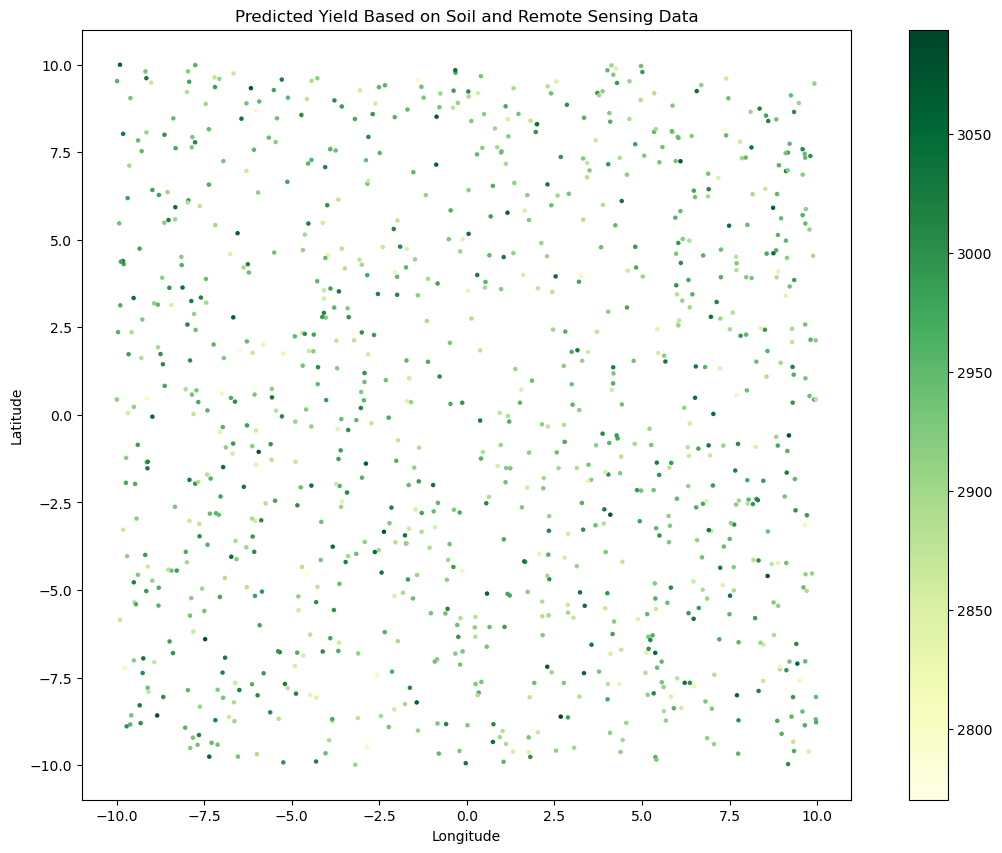

       soil_carbon  soil_moisture         ndvi          evi  fertilizer_use  \
count  1000.000000    1000.000000  1000.000000  1000.000000     1000.000000   
mean      5.549033      21.929336     0.491320     0.494825       99.775533   
std       2.581999      10.018780     0.285956     0.296249       57.923491   
min       1.000663       5.002536     0.000851     0.000150        0.574902   
25%       3.443202      13.405640     0.232470     0.223674       48.917284   
50%       5.505465      21.189241     0.492362     0.498799       99.147465   
75%       7.811042      30.681316     0.736860     0.747941      149.199549   
max       9.999676      39.997590     0.999478     0.999708      199.958838   

             yield  predicted_yield  
count  1000.000000      1000.000000  
mean   2938.683289      2938.683289  
std    1142.284754        57.731241  
min    1000.827794      2770.363091  
25%    1985.695612      2896.233990  
50%    2880.821416      2936.937994  
75%    3915.526537    

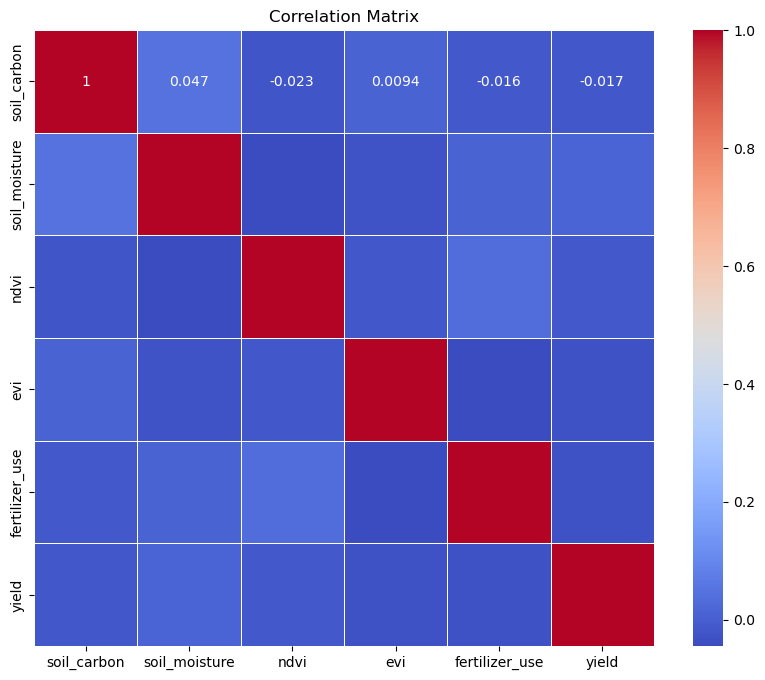

(     soil_carbon  soil_moisture      ndvi       evi  fertilizer_use
 29      4.416998      36.673012  0.563957  0.891413      162.485319
 535     9.940647      20.106604  0.313056  0.927920      142.059011
 695     4.911693      21.123704  0.049221  0.004558      105.337777
 557     5.736895      26.449259  0.300235  0.198695      150.049767
 836     9.999541      25.376551  0.228221  0.202556      185.748488
 ..           ...            ...       ...       ...             ...
 106     7.659516      24.965284  0.952545  0.690703      100.577283
 270     4.001567      10.153669  0.790570  0.910381      195.490841
 860     5.275541      22.370758  0.538900  0.288515       12.732301
 435     9.179889      18.311023  0.698696  0.039687      195.402188
 102     6.494408      13.696985  0.678588  0.139432      162.377133
 
 [800 rows x 5 columns],
      soil_carbon  soil_moisture      ndvi       evi  fertilizer_use
 521     2.717650       9.196625  0.489143  0.183271      193.529705
 737   

In [31]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize
import seaborn as sns  # Import seaborn for the correlation matrix


# Check if merged_data is not empty
if merged_data.empty:
    raise ValueError("The merged dataset is empty. Ensure the data files have overlapping latitude and longitude ranges.")

# Convert to GeoDataFrame for spatial analysis
gdf = gpd.GeoDataFrame(
    merged_data, 
    geometry=gpd.points_from_xy(merged_data.longitude, merged_data.latitude)
)

# Perform linear regression to predict yield based on soil carbon, soil moisture, ndvi, evi, and fertilizer use
X = gdf[['soil_carbon', 'soil_moisture', 'ndvi', 'evi', 'fertilizer_use']]
y = gdf['yield']

model = LinearRegression()
model.fit(X, y)
gdf['predicted_yield'] = model.predict(X)

# Visualize the results
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(column='predicted_yield', ax=ax, legend=True, cmap='YlGn', markersize=5)
plt.title('Predicted Yield Based on Soil and Remote Sensing Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Summary statistics
print(gdf[['soil_carbon', 'soil_moisture', 'ndvi', 'evi', 'fertilizer_use', 'yield', 'predicted_yield']].describe())

# Correlation Analysis
corr_matrix = gdf[['soil_carbon', 'soil_moisture', 'ndvi', 'evi', 'fertilizer_use', 'yield']].corr()
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Advanced Predictive Modeling
# Split the data into training and testing sets
X_train, X_test, y


In [33]:
from scipy.optimize import minimize

# Define the objective function
def objective_function(x):
    # Create a DataFrame for prediction with the correct feature names
    input_data = pd.DataFrame([[x[0], x[1], 0.5, 0.5, x[1]]], columns=['soil_carbon', 'soil_moisture', 'ndvi', 'evi', 'fertilizer_use'])
    
    # Predict yield
    yield_pred = model.predict(input_data)[0]
    
    # Simplified soil carbon increase calculation
    soil_carbon_increase = 0.1 * x[0]
    
    # Return the negative of the objective (since we want to maximize it)
    return -(yield_pred + soil_carbon_increase)

# Initial guess for the optimization
x0 = [20, 100]

# Constraints for the optimization variables: soil moisture and fertilizer use ranges
bounds = [(5, 40), (0, 200)]

# Perform the optimization
result = minimize(objective_function, x0, bounds=bounds)

# Extract the optimal values
optimal_soil_moisture, optimal_fertilizer_use = result.x

# Print the optimal values
print(f"Optimal Soil Moisture: {optimal_soil_moisture}")
print(f"Optimal Fertilizer Use: {optimal_fertilizer_use}")


Optimal Soil Moisture: 5.0
Optimal Fertilizer Use: 200.0


In [36]:


# With this import
from collections.abc import Sequence


In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Prepare the data
X = gdf[['soil_carbon', 'soil_moisture', 'ndvi', 'evi', 'fertilizer_use']]
y = gdf['yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a neural network model
model = Sequential()
model.add(Dense(64, input_dim=len(features), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error: {mae}')


Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9788148.0000 - mae: 2916.1289 - val_loss: 9768378.0000 - val_mae: 2915.5347
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 9191095.0000 - mae: 2797.9026 - val_loss: 9455950.0000 - val_mae: 2860.5818
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 9324975.0000 - mae: 2832.0854 - val_loss: 8998648.0000 - val_mae: 2777.6523
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 8746413.0000 - mae: 2721.6108 - val_loss: 8339457.0000 - val_mae: 2652.3677
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 7982292.0000 - mae: 2576.5413 - val_loss: 7451310.5000 - val_mae: 2470.7493
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 6629816.5000 - mae: 2300.6548 - val_loss: 6342735.0000 - val_mae: 2219.3088
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 5302028.0000 - mae: 1980.2535 - val_loss: 5107119.0000 - val_mae: 1917.4756
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 4

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 1700215.1250 - mae: 1065.4838 - val_loss: 1853478.3750 - val_mae: 1170.4635
Epoch 50/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 1768414.1250 - mae: 1089.2251 - val_loss: 1843318.7500 - val_mae: 1169.0007
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 2108374.0000 - mae: 1189.2302
Mean Absolute Error: 1192.7705078125


Decision Tree MSE: 2545468.94837326
Random Forest MSE: 1344757.6188517334


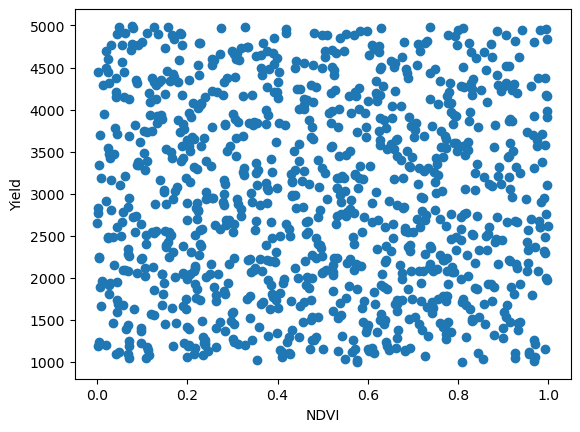

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv('merged.csv')

# Feature engineering
df['fertilizer_log'] = np.log(df['fertilizer_use'] + 1)  # Log transformation
df['soil_moisture_bin'] = pd.cut(df['soil_moisture'], bins=4, labels=False)  # Binning
df['interaction'] = df['fertilizer_log'] * df['ndvi']  # Interaction feature

# Split data
X = df[['latitude', 'longitude', 'fertilizer_log', 'ndvi', 'evi', 'soil_carbon', 'soil_moisture_bin', 'interaction']] 
y = df['yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Decision Tree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Decision Tree MSE:", mse)

# Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Random Forest MSE:", mse)

# Visualizations (using matplotlib)
import matplotlib.pyplot as plt
plt.scatter(df['ndvi'], df['yield'])
plt.xlabel('NDVI')
plt.ylabel('Yield')
plt.show()


Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9481977.0000 - mae: 2863.0259 - val_loss: 9970893.0000 - val_mae: 2950.3782
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 9518181.0000 - mae: 2872.5125 - val_loss: 9941603.0000 - val_mae: 2945.4204
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9525264.0000 - mae: 2866.2661 - val_loss: 9834570.0000 - val_mae: 2927.2024
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9343608.0000 - mae: 2834.3784 - val_loss: 9542293.0000 - val_mae: 2876.8176
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9223647.0000 - mae: 2821.8975 - val_loss: 8888275.0000 - val_mae: 2760.6250
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 8013827.5000 - mae: 2589.4707 - val_loss: 7671842.5000 - val_mae: 2529.7861
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6568833.5000 - mae: 2281.9875 - val_loss: 5807701.5000 - val_mae: 2126.5972
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4923

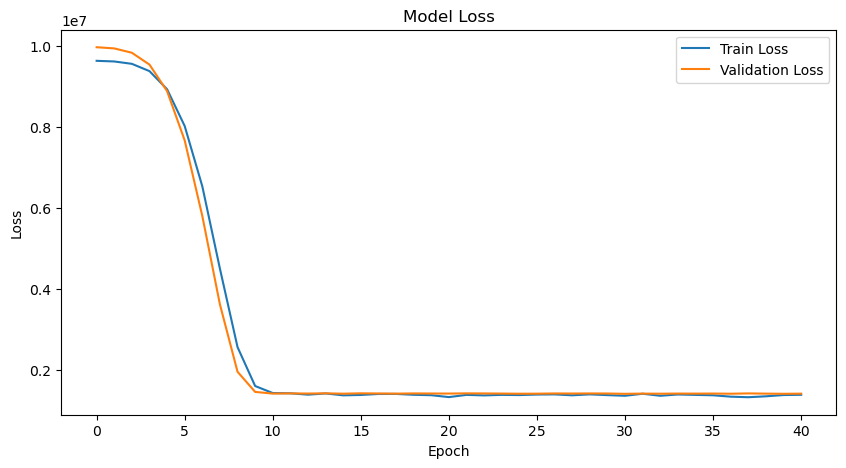

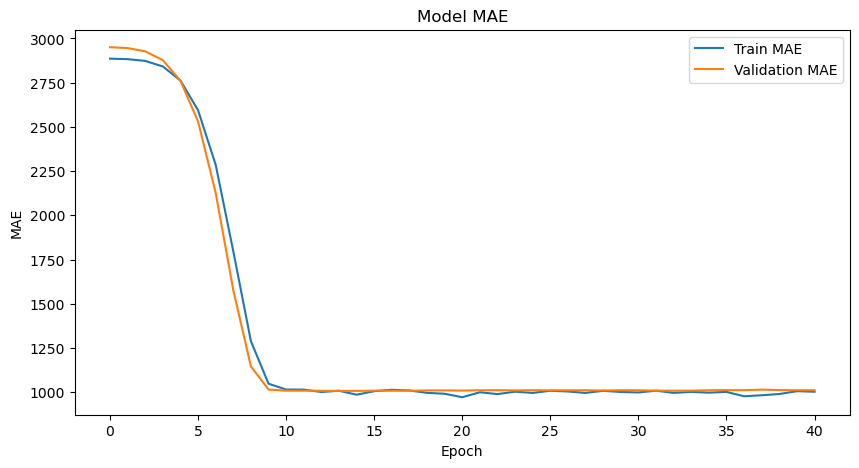

In [49]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping



# Convert to GeoDataFrame for spatial analysis
gdf = gpd.GeoDataFrame(
    merged_data, 
    geometry=gpd.points_from_xy(merged_data.longitude, merged_data.latitude)
)

# Feature selection
features = ['soil_carbon', 'soil_moisture', 'ndvi', 'evi', 'fertilizer_use']
X = gdf[features]
y = gdf['yield']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a neural network model
model = Sequential()
model.add(Dense(128, input_dim=len(features), activation='relu'))
model.add(Dropout(0.3))  # Add dropout to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error: {mae}')

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.show()
